<a href="https://colab.research.google.com/github/Sant18/Vehicle_Project/blob/main/Car_Price_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#from google.colab import files
#uploaded = files.upload()

In [3]:
import io
import pandas as pd
import numpy as np
train_data = pd.read_csv(io.BytesIO(uploaded['Car details v3.csv']))

In [4]:
df = train_data
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [5]:
for _ in df:
  if len(df[_].unique()) < 10:
    print(f'{_}: {df[_].unique()}\n')
  else:
    print(f'{_}: {len(df[_].unique())}\n')
    

name: 2058

year: 29

selling_price: 677

km_driven: 921

fuel: ['Diesel' 'Petrol' 'LPG' 'CNG']

seller_type: ['Individual' 'Dealer' 'Trustmark Dealer']

transmission: ['Manual' 'Automatic']

owner: ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']

mileage: 394

engine: 122

max_power: 323

torque: 442

seats: 10



In [6]:
#CLEANING
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0


In [7]:
def new_milage(mile):
  if mile is np.nan:
    np.nan
  else:
    new = mile.split('k')[0]
    return new.strip()

In [8]:
df['new_mileage'] = df['mileage'].apply(new_milage)
df['new_mileage'] = pd.to_numeric(df['new_mileage'])

In [9]:
df = df.drop('mileage', axis=1)

In [10]:
def new_rpm(rpm):
  if rpm is np.nan:
    np.nan
  elif '@' in rpm:
    rpm_ = rpm.split('@')[1]
    return rpm_
  elif 'at' in rpm:
    return rpm.split('at')[1]

In [11]:
df['new_rpm'] = df['torque'].apply(new_rpm)

In [12]:
def new_torque(torque):
  if torque is np.nan:
    np.nan
  elif 'nm' in torque.lower():
    torque_ = torque.lower().split('nm')[0]
    return torque_
  elif '@' in torque:
    torque_ = torque.split('@')[0]
    return torque_
  elif 'kgm' in torque:
    torque_ = torque.split('kgm')[0]
    return torque_

In [13]:
df['new_torque'] = df['torque'].apply(new_torque)

In [14]:
'''def fix_torque(torque):
  if torque is np.nan:
    np.nan
  elif 'kgm' in torque:
    torque_ = torque.split('kgm')[0]
    return torque_'''

"def fix_torque(torque):\n  if torque is np.nan:\n    np.nan\n  elif 'kgm' in torque:\n    torque_ = torque.split('kgm')[0]\n    return torque_"

In [15]:
def fix_torque(torque):
  if torque is None:
    np.nan
  elif 'kgm' in torque:
    torque_ = torque.lower().split('k')[0]
    return torque_
  else:
    return torque

In [16]:
def fix_torque_v2(torque):
  if torque is None:
    np.nan
  elif '@' in torque:
    torque_ = torque.lower().split('@')[0]
    return torque_
  elif '(' in torque:
    torque_ = torque.lower().split('(')[0]
    return torque_
  else:
    return torque

In [17]:
df['new_torque'] = df['new_torque'].apply(fix_torque)

In [18]:
df['new_torque'] = df['new_torque'].apply(fix_torque_v2)

In [19]:
df['new_torque'] = pd.to_numeric(df['new_torque'])

In [20]:
#Check if col numeric
pd.to_numeric(df['year'], errors='coerce').notnull().all()

True

In [21]:
def fix_rpm(rpm):
  if rpm is None:
    return np.nan
  elif 'rpm' in rpm:
    return rpm.split('r')[0]
  elif '(' in rpm:
    return rpm.split('(')[0]

In [22]:
df['new_rpm'] = df['new_rpm'].apply(fix_rpm)

In [23]:
def fix_rpm_v2(rpm):
  if rpm is None:
    return np.nan
  elif rpm is np.nan:
    np.nan
  elif '-' in rpm:
    rpm_list = rpm.strip().split('-')
    upper = rpm_list[0].replace(',', '')
    lower = rpm_list[1].replace(',', '')
    if '+' in upper:
      upper = upper.split('+')[0]
    return np.mean([float(upper), float(lower)])
  else:
    return rpm.replace(',','')

In [24]:
df['new_rpm'] = df['new_rpm'].apply(fix_rpm_v2) 

In [25]:
df_copy4 = df.copy()

In [26]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,new_mileage,new_rpm,new_torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.40,2000,190.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,2000,250.00
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.70,2700,12.70
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00,2250,22.40
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,4500,11.50
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,20.14,4000,113.75
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,17.30,4500,7.80
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,796 CC,37 bhp,59Nm@ 2500rpm,4.0,16.10,2500,59.00
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0,23.59,2100,170.00
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0,20.00,2000,160.00


In [27]:
def fix_max_power(power):
  if (power is np.nan or power == '0'):
    return np.nan
  elif 'bhp' in power:
    return power.split('b')[0]

In [28]:
df['new_max_power'] = df['max_power'].apply(fix_max_power) 

In [29]:
df = df.drop(['torque', 'max_power'], axis=1)

In [30]:
df.loc[df['engine']=='0']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats,new_mileage,new_rpm,new_torque,new_max_power


In [31]:
df['engine'] = df['engine'].apply(lambda x: np.nan if x is np.nan else x.strip().split('C')[0])

In [32]:
df['new_max_power'] = df['new_max_power'].apply(lambda x: np.nan if x ==' ' else x)

In [33]:
df['new_max_power'] = pd.to_numeric(df['new_max_power'])

In [34]:
#df.groupby(['transmission', 'seller_type']).agg({'new_torque': 'mean', 'new_mileage': 'mean'})

In [35]:
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats,new_mileage,new_rpm,new_torque,new_max_power
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248,5.0,23.4,2000,190.0,74.0


In [36]:
train_data.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,new_mileage
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.4


In [37]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats,new_mileage,new_rpm,new_torque,new_max_power
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248,5.0,23.40,2000,190.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498,5.0,21.14,2000,250.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497,5.0,17.70,2700,12.7,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396,5.0,23.00,2250,22.4,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298,5.0,16.10,4500,11.5,88.20


In [38]:
df = df.drop('name', axis=1)

In [39]:
dff = df.copy()

In [40]:
df['age'] = df.apply(lambda x: 2021 - x['year'], axis=1)

In [41]:
df['engine'] = pd.to_numeric(df['engine'])

In [42]:
def fix_rpm_v4(v):
  if (v is np.nan or v is None):
    return np.nan
  if '~' in str(v):
    value = str(v).split('~')
    lower = value[0]
    upper = value[1]
    return np.mean([float(upper), float(lower)])
  else:
    return v

In [43]:
df['new_rpm'] = df['new_rpm'].apply(fix_rpm_v4)

In [44]:
df['new_rpm'] = pd.to_numeric(df['new_rpm'])

In [45]:
num = [] 

for _ in df.loc[:, df.dtypes != np.object]:
  if len(df[_].unique()) > 20:
    num.append(_)

In [46]:
def outlier(variable):
  for i in variable:
    q3 = np.percentile(df[i], 75)
    q1 = np.percentile(df[i], 25)
    iqr = q3 - q1
    lower = q1 - iqr*3
    upper = q3 + iqr*3
    v_lower = df.loc[df[i] < lower, i]
    v_upper = df.loc[df[i] > upper, i]
    print(f'{i}')
    print(f'Lower: {v_lower}\n')
    print(f'Upper: {v_upper}\n')

In [47]:
outlier(num)

year
Lower: 316     1983
5322    1991
Name: year, dtype: int64

Upper: Series([], Name: year, dtype: int64)

selling_price
Lower: Series([], Name: selling_price, dtype: int64)

Upper: 41       2100000
82       2500000
131      3975000
132      5150000
133      3200000
134      4100000
135      4500000
136      6000000
137      3790000
138      2150000
139      5800000
141      2700000
145      3400000
146      2650000
148      5850000
151      2625000
156      2550000
158      2700000
165      2150000
167      2900000
170     10000000
288      4600000
350      3000000
370      2625000
371      5150000
372      3200000
374      3800000
375      2000000
384      5400000
385      5500000
388      2475000
409      2625000
410      5150000
411      3200000
413      3800000
414      2000000
423      5400000
424      5500000
427      2475000
468      2000000
646      2625000
647      5150000
648      3200000
650      3800000
651      2000000
660      5400000
661      5500000
664      2475000


In [48]:
'''from sklearn.ensemble import IsolationForest

df_dum = df[num].copy()
df_dum = df_dum.dropna()

iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(df_dum)'''

'from sklearn.ensemble import IsolationForest\n\ndf_dum = df[num].copy()\ndf_dum = df_dum.dropna()\n\niso = IsolationForest(contamination=0.1)\nyhat = iso.fit_predict(df_dum)'

In [49]:
num

['year',
 'selling_price',
 'km_driven',
 'engine',
 'new_mileage',
 'new_rpm',
 'new_torque',
 'new_max_power',
 'age']

In [50]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


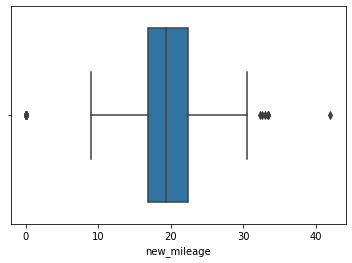

In [51]:
sns.boxplot(df['new_mileage'])

In [52]:
df.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
engine           221
seats            221
new_mileage      221
new_rpm          287
new_torque       242
new_max_power    222
age                0
dtype: int64

In [53]:
df.loc[df['new_mileage']<40].shape

(7906, 14)

In [54]:
df.loc[df['new_mileage']>40]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats,new_mileage,new_rpm,new_torque,new_max_power,age
170,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,1969.0,4.0,42.0,1740.0,640.0,400.0,4


In [55]:
df = df.loc[df['km_driven']<1400000]

In [56]:
df = df.loc[df['new_mileage']<40]

In [57]:
df = df.loc[df['new_rpm']<20000]

In [58]:
df = df.loc[df['new_torque']<700]

In [59]:
df_owner_torque = df[['new_torque']]
df = df.drop(['new_torque'], axis=1)

In [60]:
df_owner_torque = df_owner_torque.mask(np.random.choice([True, False], size=df_owner_torque.shape, p=[.02,.98]))

In [61]:
df = pd.concat([df, df_owner_torque], axis=1)

In [62]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats,new_mileage,new_rpm,new_max_power,age,new_torque
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248.0,5.0,23.40,2000.0,74.00,7,190.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498.0,5.0,21.14,2000.0,103.52,7,250.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497.0,5.0,17.70,2700.0,78.00,15,12.7
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396.0,5.0,23.00,2250.0,90.00,11,22.4
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298.0,5.0,16.10,4500.0,88.20,14,11.5


In [63]:
df['owner'].value_counts()

First Owner             5171
Second Owner            1999
Third Owner              500
Fourth & Above Owner     159
Test Drive Car             5
Name: owner, dtype: int64

In [64]:
df.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
engine             0
seats              0
new_mileage        0
new_rpm            0
new_max_power      0
age                0
new_torque       144
dtype: int64

In [65]:
df[['new_torque']].head(10)

,new_torque
0,190.00
1,250.00
2,12.70
3,22.40
4,11.50
5,113.75
6,7.80
7,59.00
8,170.00
9,160.00


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'engine', 'seats', 'new_mileage', 'new_rpm',
       'new_max_power', 'age', 'new_torque'],
      dtype='object')

In [67]:
df_copy = df.copy()

from sklearn.impute import KNNImputer

In [68]:
numeric = []

for i in df:
  if df[i].dtype != 'object':
    numeric.append(i)

In [69]:
df[numeric].isnull().sum()

year               0
selling_price      0
km_driven          0
engine             0
seats              0
new_mileage        0
new_rpm            0
new_max_power      0
age                0
new_torque       144
dtype: int64

In [70]:
numeric.remove('year')
numeric.remove('selling_price')
numeric.remove('age')
numeric.remove('seats')

In [71]:
numeric

['km_driven',
 'engine',
 'new_mileage',
 'new_rpm',
 'new_max_power',
 'new_torque']

In [72]:
df = df.reset_index()

In [73]:
df_num = df[numeric]

In [74]:
df_num[df_num.isnull().any(axis=1)].head(20)

,km_driven,engine,new_mileage,new_rpm,new_max_power,new_torque
42,23300,1197.0,18.50,4000.0,83.14,NaN
79,30000,1998.0,15.71,2975.0,189.00,NaN
109,69000,1396.0,21.90,2125.0,88.76,NaN
112,60000,1248.0,24.30,1750.0,88.50,NaN
278,35000,1197.0,18.90,4000.0,82.00,NaN
305,25000,1396.0,21.38,2125.0,88.70,NaN
315,120000,2494.0,12.80,2400.0,102.00,NaN
329,16500,1197.0,17.00,2750.0,110.00,NaN
363,5621,1197.0,22.00,4200.0,81.80,NaN
385,80000,998.0,23.95,3500.0,67.05,NaN


In [75]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [76]:
impute_it = IterativeImputer()
df_imp = impute_it.fit_transform(df_num)

In [77]:
df_imp = pd.DataFrame(df_imp)

In [78]:
df_imp_ = df_imp.rename(columns={0:'km_driven', 1:'engine', 2:'new_mileage', 3:'new_rpm', 4:'new_max_power', 5:'new_torque'})

In [79]:
df_imp_.loc[[946]]

,km_driven,engine,new_mileage,new_rpm,new_max_power,new_torque
946,60000.0,998.0,20.92,3500.0,67.1,90.0


In [80]:
df_imp_.loc[[946]]

,km_driven,engine,new_mileage,new_rpm,new_max_power,new_torque
946,60000.0,998.0,20.92,3500.0,67.1,90.0


In [81]:
df_imp_.head()

,km_driven,engine,new_mileage,new_rpm,new_max_power,new_torque
0,145500.0,1248.0,23.40,2000.0,74.00,190.0
1,120000.0,1498.0,21.14,2000.0,103.52,250.0
2,140000.0,1497.0,17.70,2700.0,78.00,12.7
3,127000.0,1396.0,23.00,2250.0,90.00,22.4
4,120000.0,1298.0,16.10,4500.0,88.20,11.5


In [82]:
df = df.drop('new_torque', axis=1)
df_imp_trq = df_imp_[['new_torque']]

df = pd.concat([df, df_imp_trq], axis=1)

In [83]:
df = df.drop('index', axis=1)

In [84]:
df.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
engine           0
seats            0
new_mileage      0
new_rpm          0
new_max_power    0
age              0
new_torque       0
dtype: int64

In [85]:
#!pip install datawig

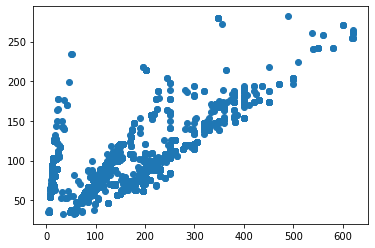

In [86]:
plt.scatter(df['new_torque'], df['new_max_power'])

In [87]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats,new_mileage,new_rpm,new_max_power,age,new_torque
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248.0,5.0,23.40,2000.0,74.00,7,190.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498.0,5.0,21.14,2000.0,103.52,7,250.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497.0,5.0,17.70,2700.0,78.00,15,12.7
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396.0,5.0,23.00,2250.0,90.00,11,22.4
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298.0,5.0,16.10,4500.0,88.20,14,11.5


In [88]:
cols = []

for col in df.select_dtypes(include='object'):
  cols.append(col)

In [89]:
cols

['fuel', 'seller_type', 'transmission', 'owner']

In [90]:
df.fuel.value_counts()

Diesel    4233
Petrol    3514
CNG         52
LPG         35
Name: fuel, dtype: int64

In [91]:
df.groupby('fuel').agg(lambda x: x.value_counts().index[0])['seller_type']

fuel
CNG       Individual
Diesel    Individual
LPG       Individual
Petrol    Individual
Name: seller_type, dtype: object

In [92]:
df.groupby('fuel')['seller_type'].agg(pd.Series.mode)

fuel
CNG       Individual
Diesel    Individual
LPG       Individual
Petrol    Individual
Name: seller_type, dtype: object

In [93]:
fuel_df = pd.DataFrame(df.groupby('fuel')['selling_price'].mean()).sort_values(by='selling_price', ascending=False)

fuel_df = fuel_df[['selling_price']].apply(lambda x: round(x, 2)) 

fuel_df

,selling_price
fuel,
Diesel,781015.54
Petrol,470057.35
CNG,317903.79
LPG,210885.71


In [94]:
df.fuel.value_counts()

Diesel    4233
Petrol    3514
CNG         52
LPG         35
Name: fuel, dtype: int64

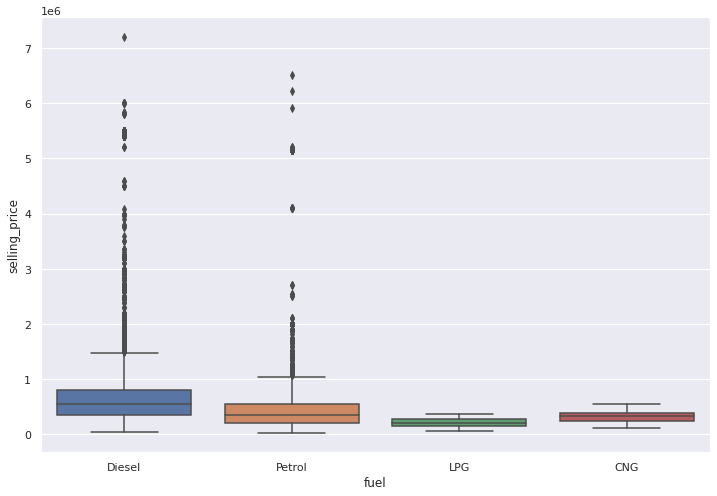

In [95]:
#fig, ax = plt.subplots(figsize=(12, 8))
sns.set(rc={'figure.figsize': (12,8)})

ax = sns.boxplot(x='fuel', y='selling_price', data=df)

In [96]:
df_diesel = pd.DataFrame(df.loc[df['fuel']=='Diesel', 'selling_price'])

In [97]:
df.fuel.value_counts()

Diesel    4233
Petrol    3514
CNG         52
LPG         35
Name: fuel, dtype: int64

In [98]:
values = df.fuel.value_counts()[-2:].index

In [99]:
df['fuel'] = df['fuel'].apply(lambda x: 'Other' if x in values else x)

In [100]:
cols.remove('fuel')

In [101]:
cols

['seller_type', 'transmission', 'owner']

In [102]:
df['seller_type'].value_counts()

Individual          6495
Dealer              1103
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [103]:
type_df = pd.DataFrame(df.groupby('seller_type')['selling_price'].mean()).sort_values(by='selling_price', ascending=False)

type_df = fuel_df[['selling_price']].apply(lambda x: round(x, 2)) 

type_df

,selling_price
fuel,
Diesel,781015.54
Petrol,470057.35
CNG,317903.79
LPG,210885.71


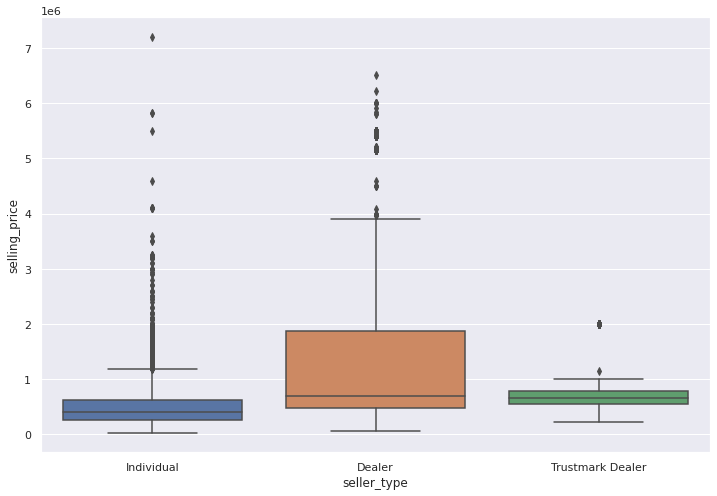

In [104]:
ax = sns.boxplot(x='seller_type', y='selling_price', data=df)

In [105]:
cols.remove('seller_type')

In [106]:
df['transmission'].value_counts()

Manual       6832
Automatic    1002
Name: transmission, dtype: int64

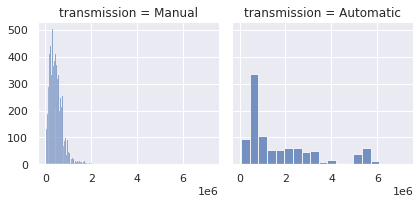

In [107]:
man = df.loc[df['transmission']=='Manual', 'selling_price']
auto = df.loc[df['transmission']=='Automatic', 'selling_price']

sns.set(rc={'figure.figsize': (12,8)})

ax = sns.FacetGrid(df, col='transmission')
ax.map_dataframe(sns.histplot, x='selling_price', data=df)
plt.show()

In [108]:
tra_df = pd.DataFrame(df.groupby('transmission')['selling_price'].mean()).sort_values(by='selling_price', ascending=False)

tra_df = tra_df[['selling_price']].apply(lambda x: round(x, 2)) 

tra_df

,selling_price
transmission,
Automatic,1809460.06
Manual,463795.86


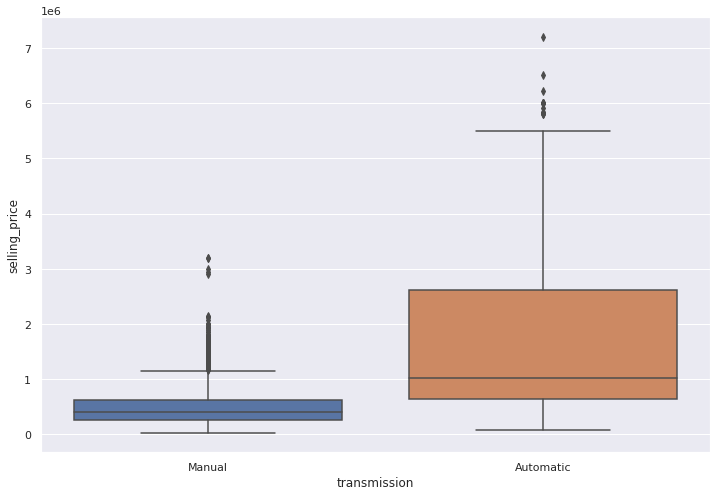

In [109]:
ax = sns.boxplot(x='transmission', y='selling_price', data=df)

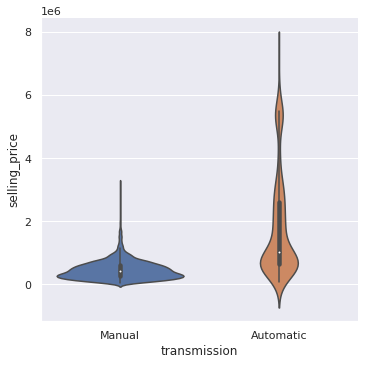

In [110]:
sns.catplot(x='transmission', y='selling_price', kind='violin', data=df)
#sns.swarmplot(x='transmission', y='selling_price', data=df, size=3)

In [111]:
cols.remove('transmission')

In [112]:
own_df = pd.DataFrame(df.groupby('owner')['selling_price'].mean()).sort_values(by='selling_price', ascending=False)

own_df = own_df[['selling_price']].apply(lambda x: round(x, 2)) 

own_df

,selling_price
owner,
Test Drive Car,4403800.00
First Owner,768504.17
Second Owner,402441.83
Third Owner,288461.03
Fourth & Above Owner,233122.59


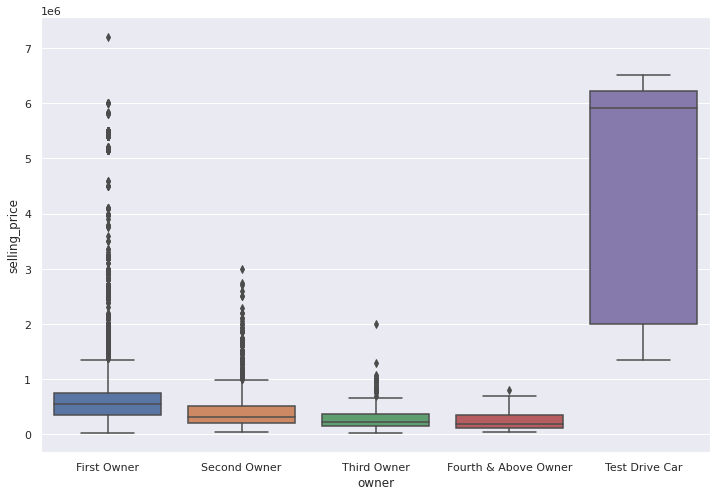

In [113]:
ax = sns.boxplot(x='owner', y='selling_price', data=df)

In [114]:
values = df['owner'].value_counts()[2:4].index

In [115]:
df['owner'] = df['owner'].apply(lambda x: 'Third & Above' if x in values else x)

In [116]:
df['owner'].value_counts()

First Owner       5171
Second Owner      1999
Third & Above      659
Test Drive Car       5
Name: owner, dtype: int64

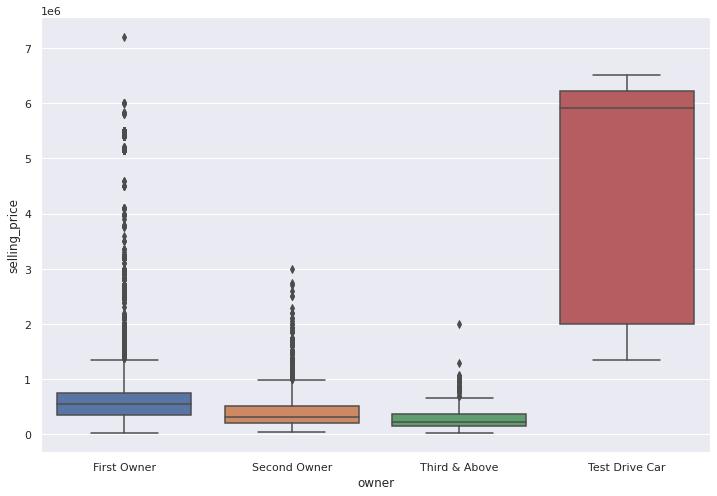

In [117]:
ax = sns.boxplot(x='owner', y='selling_price', data=df)

In [118]:
df.loc[df['owner']=='Test Drive Car']

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats,new_mileage,new_rpm,new_max_power,age,new_torque
4216,2019,1350000,5400,Diesel,Dealer,Manual,Test Drive Car,1498.0,5.0,22.27,2250.0,108.60,2,250.0
4766,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,1798.0,5.0,15.26,2750.0,187.74,2,320.0
4767,2019,5923000,11500,Petrol,Dealer,Automatic,Test Drive Car,1798.0,5.0,15.26,2750.0,187.74,2,320.0
4768,2019,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,1798.0,5.0,15.26,2750.0,187.74,2,320.0
5987,2019,2000000,24857,Petrol,Dealer,Automatic,Test Drive Car,1799.0,5.0,16.50,4300.0,139.46,2,174.0


In [119]:
seat_df = pd.DataFrame(df.groupby('seats')['selling_price'].mean()).sort_values(by='selling_price', ascending=False)

seat_df = seat_df[['selling_price']].apply(lambda x: round(x, 2)) 

seat_df

,selling_price
seats,
7.0,813728.95
2.0,700500.00
5.0,613423.34
8.0,585855.28
6.0,581596.77
9.0,512610.32
4.0,414694.70
10.0,344105.11
14.0,235000.00


In [120]:
df['seats'].value_counts()

5.0     6188
7.0     1118
8.0      235
4.0      132
9.0       77
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

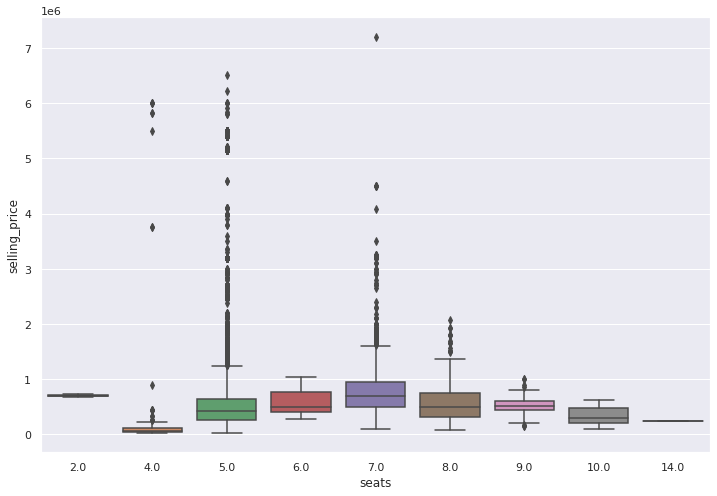

In [121]:
ax = sns.boxplot(x='seats', y='selling_price', data=df)

In [122]:
#CHECK TEST DRIVER DATA

In [123]:
df.owner.value_counts()

First Owner       5171
Second Owner      1999
Third & Above      659
Test Drive Car       5
Name: owner, dtype: int64

In [124]:
df['power_torque'] = df['new_max_power'] + df['new_torque'] 

In [125]:
df = df.drop(['year', 'seats'], axis=1)

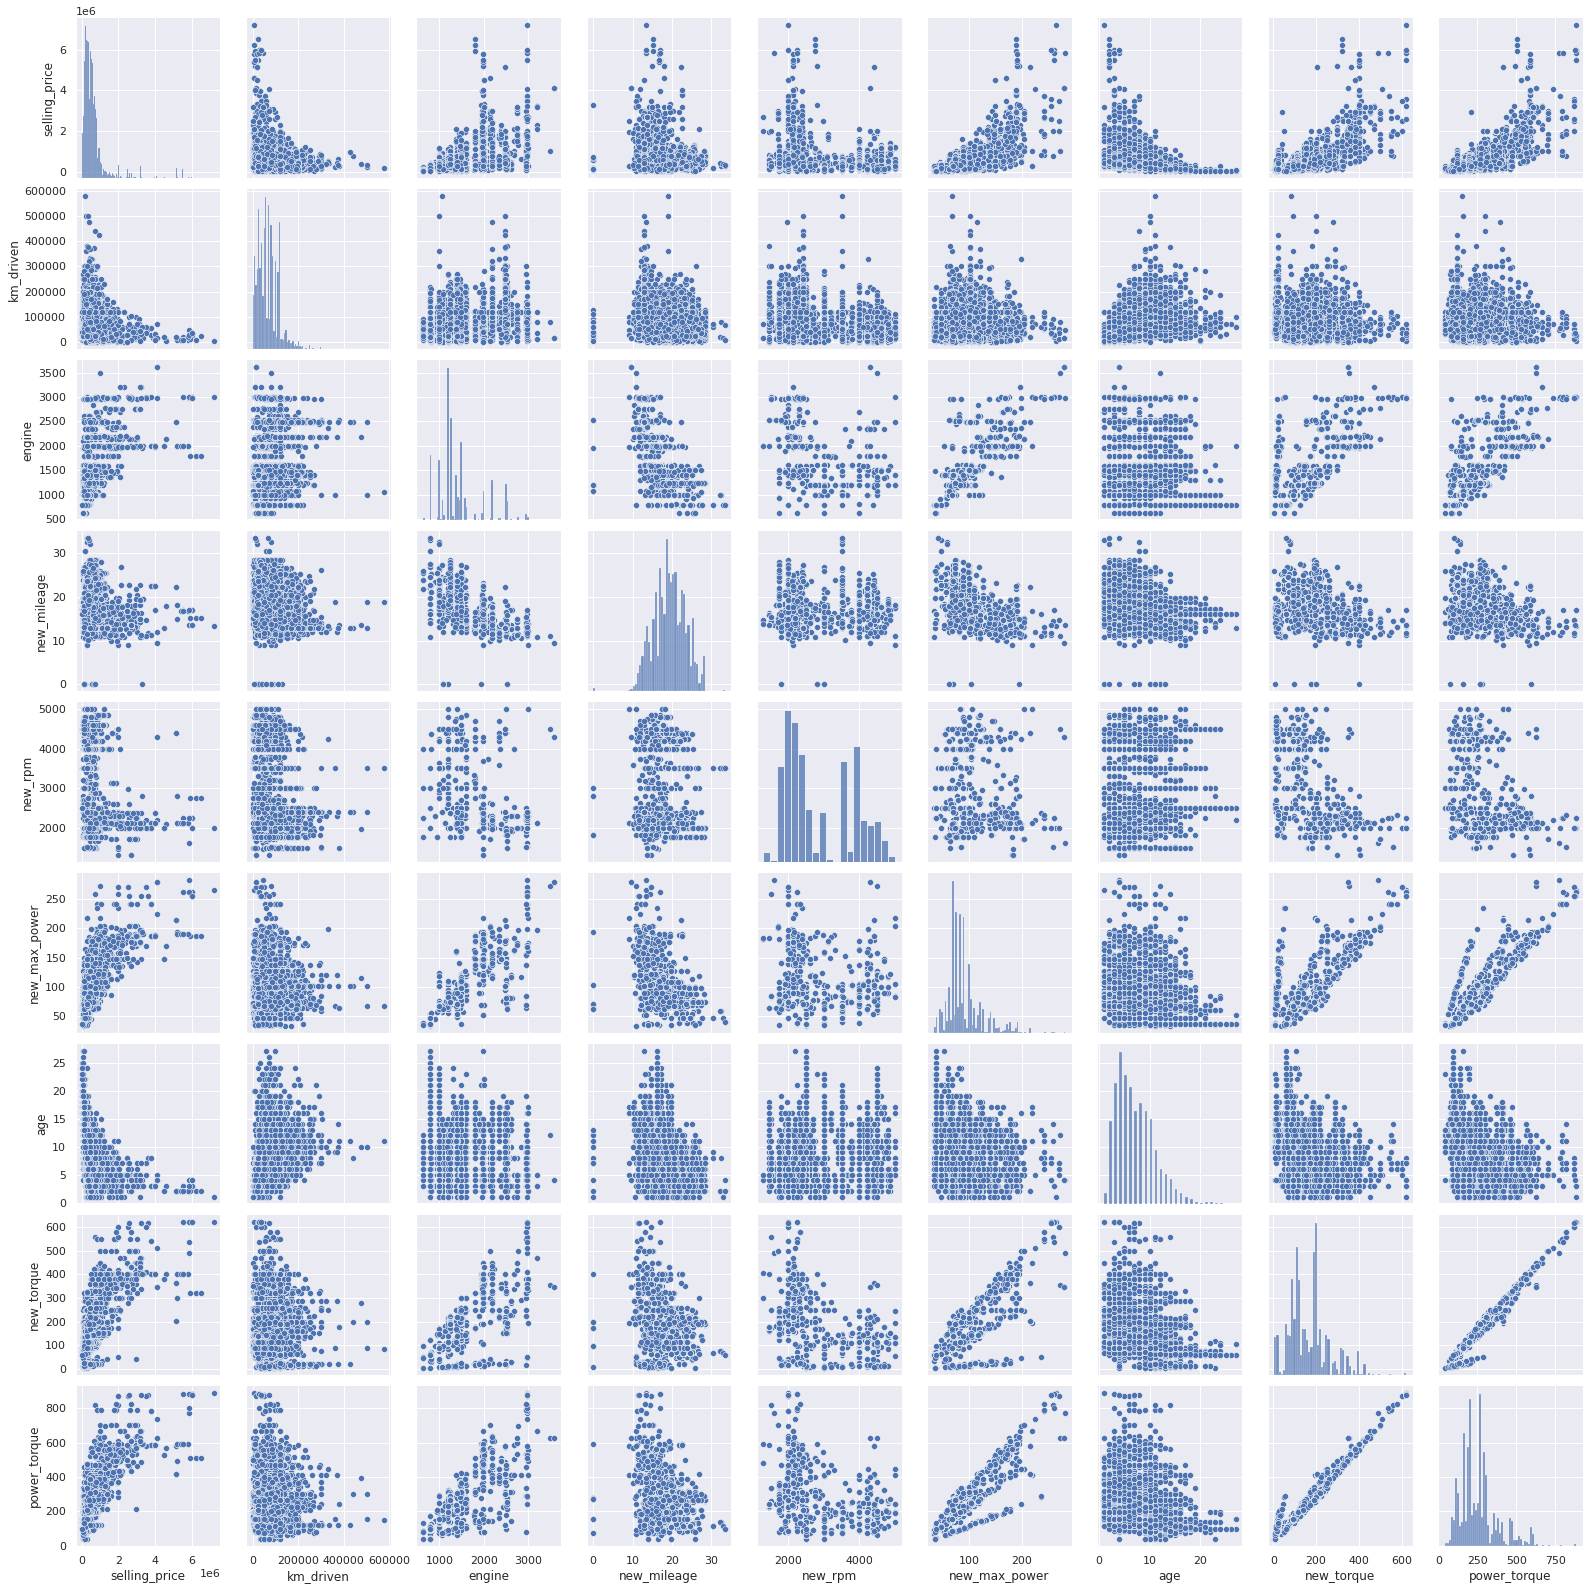

In [126]:
sns.pairplot(df)

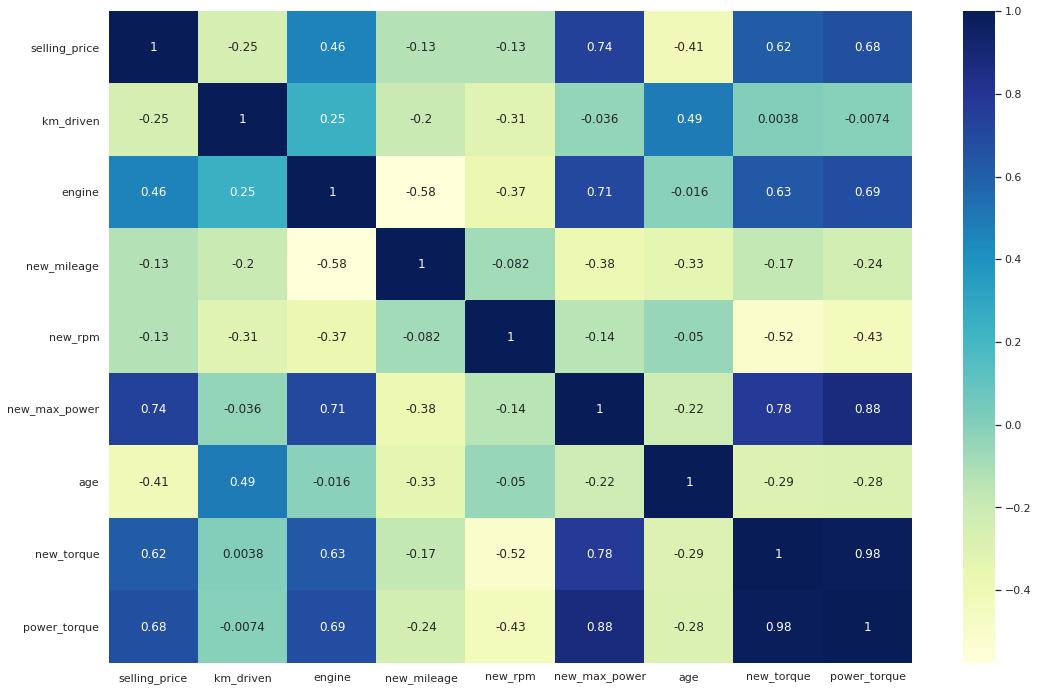

In [127]:
sns.set(rc={'figure.figsize': (18,12)})

sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [128]:
for i in df.select_dtypes(include='object'):
  print(i)

fuel
seller_type
transmission
owner


In [129]:
pd.DataFrame(df.corr()['selling_price']).sort_values(by='selling_price', ascending=False)

,selling_price
selling_price,1.000000
new_max_power,0.737250
power_torque,0.678793
new_torque,0.615534
engine,0.458816
new_rpm,-0.127292
new_mileage,-0.132695
km_driven,-0.254356
age,-0.408358


In [130]:
df = df.drop(['new_max_power', 'new_torque'], axis=1)

In [131]:
obj = []

for i in df:
  if df[i].dtype != 'object':
    obj.append(i)

In [132]:
obj

['selling_price',
 'km_driven',
 'engine',
 'new_mileage',
 'new_rpm',
 'age',
 'power_torque']

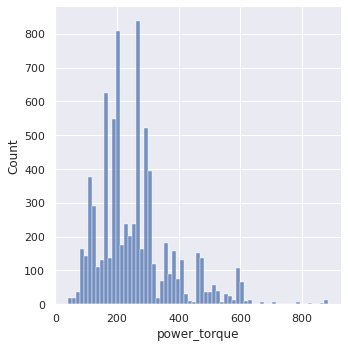

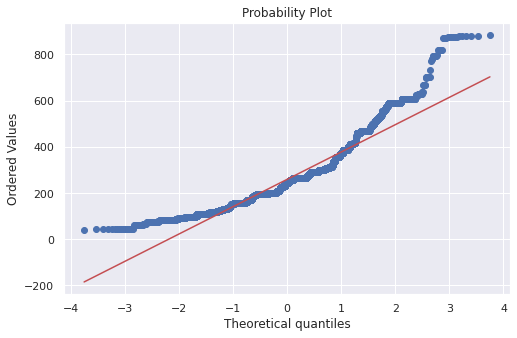

In [133]:
from scipy import stats
import matplotlib.pyplot as plt

sns.displot(df['power_torque'])
plt.figure(figsize=(8, 5))
stats.probplot(df['power_torque'], plot=plt)
plt.show()

In [134]:
pd.DataFrame(round(df['power_torque'].describe(),2))

,power_torque
count,7834.00
mean,258.26
std,124.23
min,39.80
25%,171.05
50%,243.00
75%,300.60
max,885.00


In [135]:
df['power_torque'] = np.log(df['power_torque'])

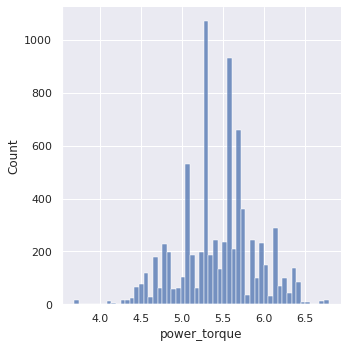

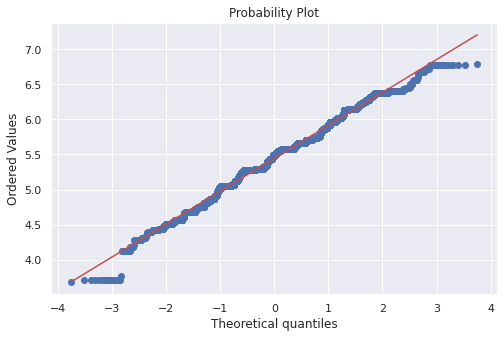

In [136]:
from scipy import stats
import matplotlib.pyplot as plt

sns.displot(df['power_torque'])
plt.figure(figsize=(8, 5))
stats.probplot(df['power_torque'], plot=plt)
plt.show()

In [137]:
df.corr()['selling_price']

selling_price    1.000000
km_driven       -0.254356
engine           0.458816
new_mileage     -0.132695
new_rpm         -0.127292
age             -0.408358
power_torque     0.574039
Name: selling_price, dtype: float64

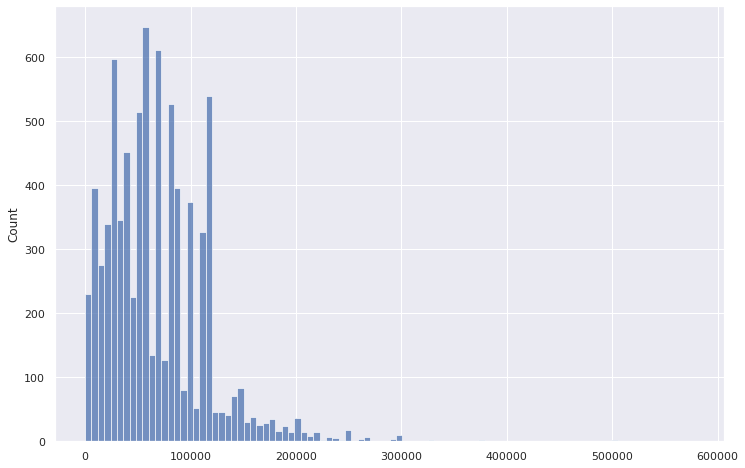

In [138]:
#sns.set(rc={'figure.figsize': (24,12)})

fig, ax = plt.subplots(figsize=(12, 8))

ax = sns.histplot(df['km_driven'].values)
plt.show()

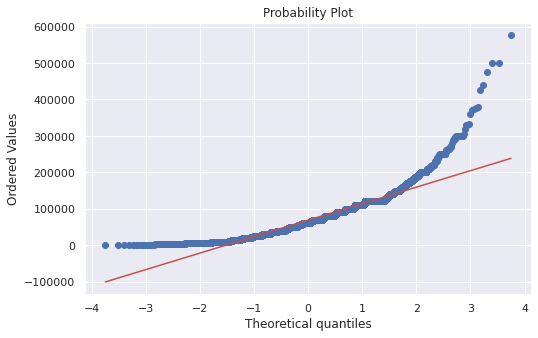

In [139]:
plt.figure(figsize=(8, 5))
stats.probplot(df['km_driven'], plot=plt)
plt.show()

In [140]:
df['km_driven'] = np.log(df['km_driven'])

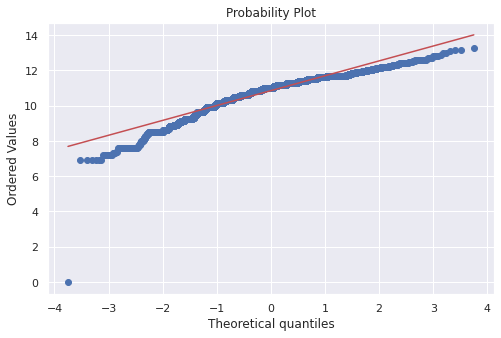

In [141]:
plt.figure(figsize=(8, 5))
stats.probplot(df['km_driven'], plot=plt)
plt.show()

In [142]:
df.corr()['selling_price']

selling_price    1.000000
km_driven       -0.333560
engine           0.458816
new_mileage     -0.132695
new_rpm         -0.127292
age             -0.408358
power_torque     0.574039
Name: selling_price, dtype: float64

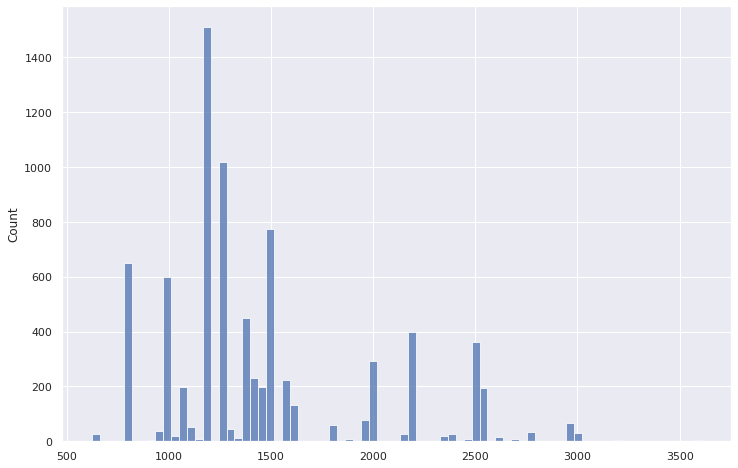

In [143]:
fig, ax = plt.subplots(figsize=(12, 8))

ax = sns.histplot(df['engine'].values)
plt.show()

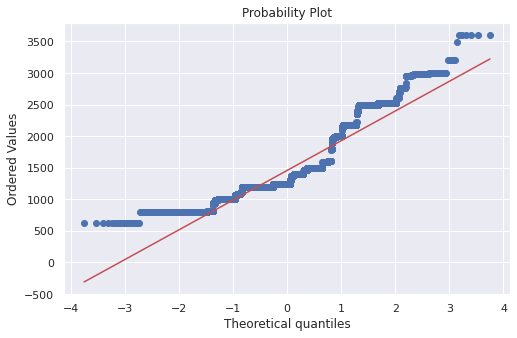

In [144]:
plt.figure(figsize=(8, 5))
stats.probplot(df['engine'], plot=plt)
plt.show()

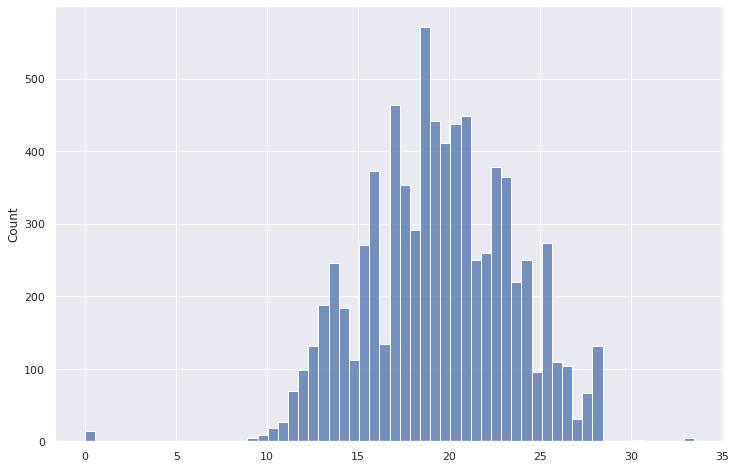

In [145]:
fig, ax = plt.subplots(figsize=(12, 8))

ax = sns.histplot(df['new_mileage'].values)
plt.show()

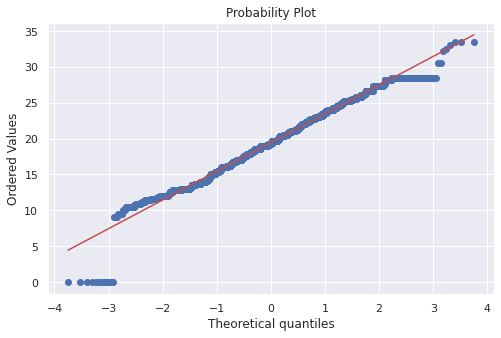

In [146]:
plt.figure(figsize=(8, 5))
stats.probplot(df['new_mileage'], plot=plt)
plt.show()

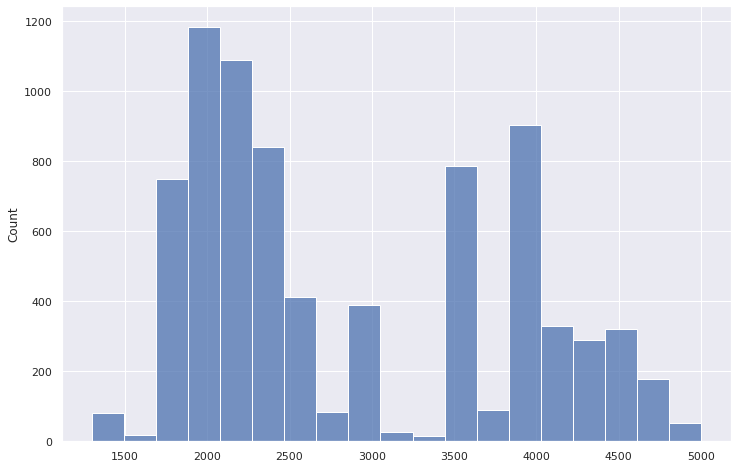

In [147]:
fig, ax = plt.subplots(figsize=(12, 8))

ax = sns.histplot(df['new_rpm'].values)
plt.show()

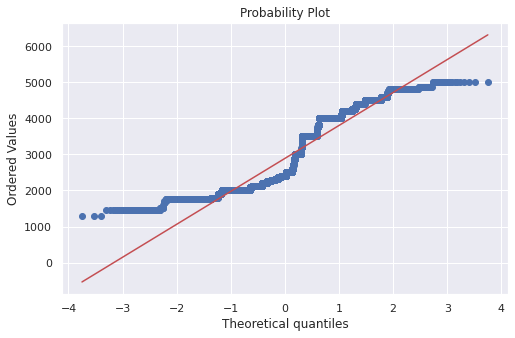

In [148]:
plt.figure(figsize=(8, 5))
stats.probplot(df['new_rpm'], plot=plt)
plt.show()

In [149]:
df.corr()['selling_price']

selling_price    1.000000
km_driven       -0.333560
engine           0.458816
new_mileage     -0.132695
new_rpm         -0.127292
age             -0.408358
power_torque     0.574039
Name: selling_price, dtype: float64

In [150]:
#df['bin_rpm'] = df['new_rpm'].apply(lambda x: 'High' if x>3250 else 'Low')

In [151]:
#ax = sns.scatterplot(x='selling_price', y='new_rpm', data=df, hue='bin_rpm')

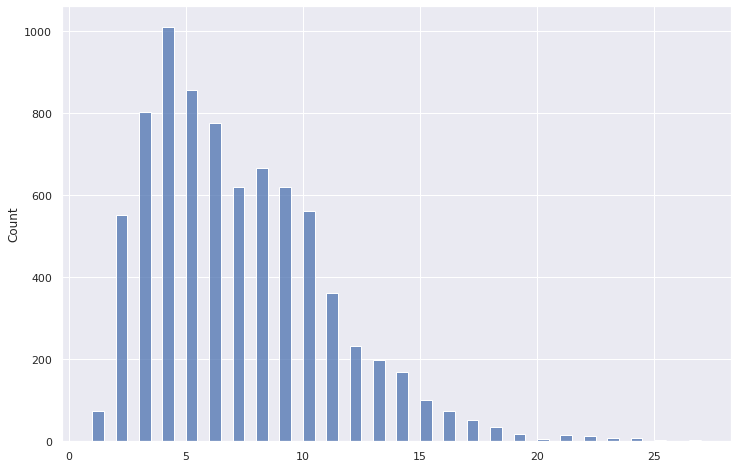

In [152]:
fig, ax = plt.subplots(figsize=(12, 8))

ax = sns.histplot(df['age'].values)
plt.show()

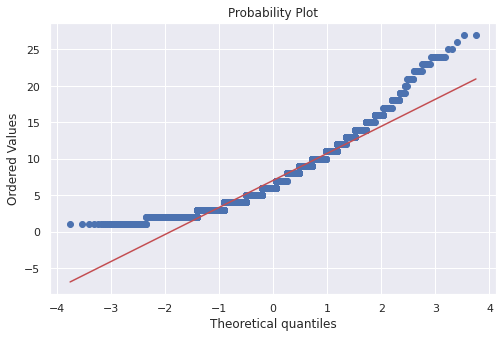

In [153]:
plt.figure(figsize=(8, 5))
stats.probplot(df['age'], plot=plt)
plt.show()

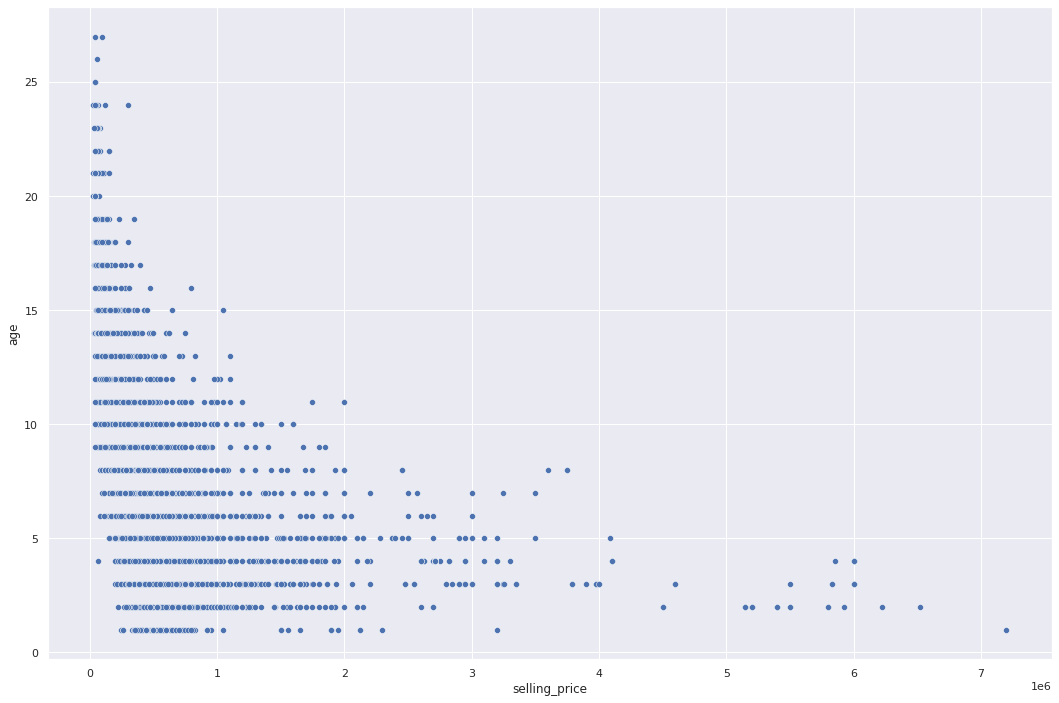

In [154]:
ax = sns.scatterplot(x='selling_price', y='age', data=df)

In [155]:
len(df.loc[df['age']>12])

705

In [156]:
#len(df.loc[(df["age"] <=12) & (df["age"] >= 5)])

In [157]:
len(df.loc[df['age']<=12])

7129

In [158]:
#df['age_bin'] = pd.qcut(df['age'], q=3, labels = ['low', 'median', 'high'])
#df['age_bin'] = pd.qcut(df['age'], q=2, labels = ['low', 'high'])
#df['age_bin'] = pd.cut(df['age'], [0, 12, np.inf], labels = ['low', 'high'])

In [159]:
#ax = sns.scatterplot(x='selling_price', y='age', data=df, hue='age_bin')

In [160]:
df.corr()['selling_price']

selling_price    1.000000
km_driven       -0.333560
engine           0.458816
new_mileage     -0.132695
new_rpm         -0.127292
age             -0.408358
power_torque     0.574039
Name: selling_price, dtype: float64

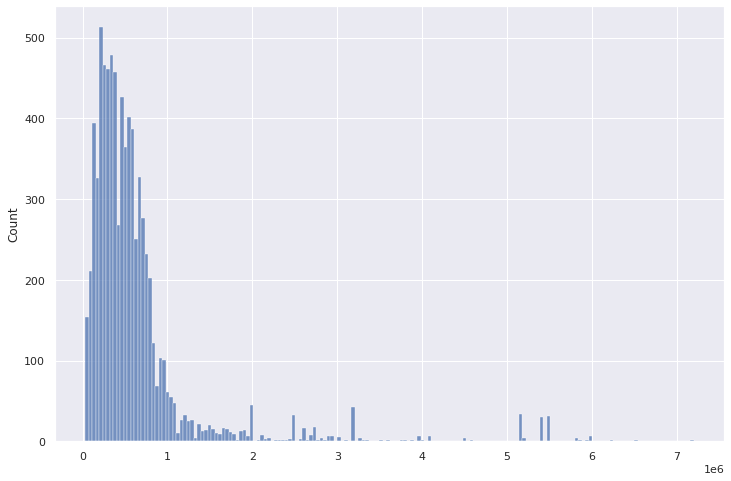

In [161]:
fig, ax = plt.subplots(figsize=(12, 8))

ax = sns.histplot(df['selling_price'].values)
plt.show()

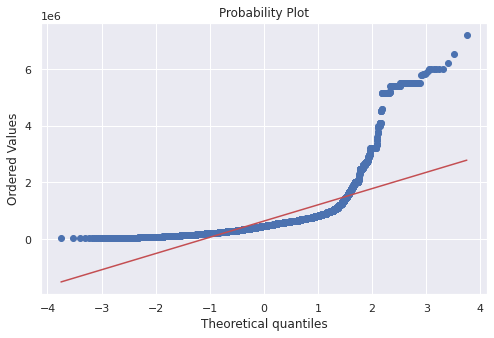

In [162]:
plt.figure(figsize=(8, 5))
stats.probplot(df['selling_price'], plot=plt)
plt.show()

In [163]:
df['selling_price'] = np.log(df['selling_price'])

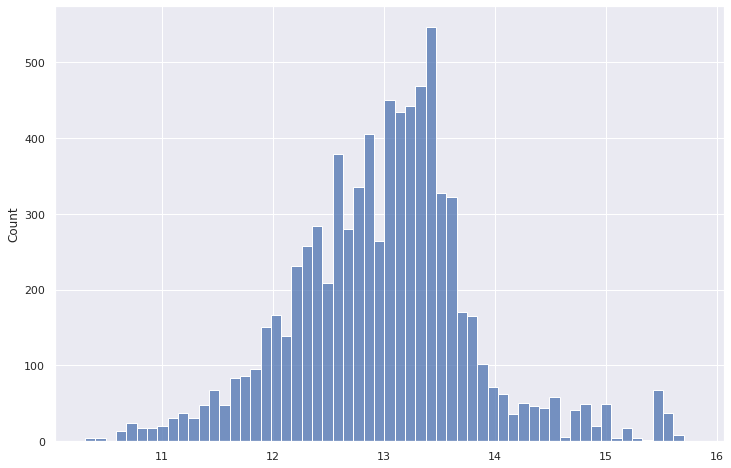

In [164]:
fig, ax = plt.subplots(figsize=(12, 8))

ax = sns.histplot(df['selling_price'].values)
plt.show()

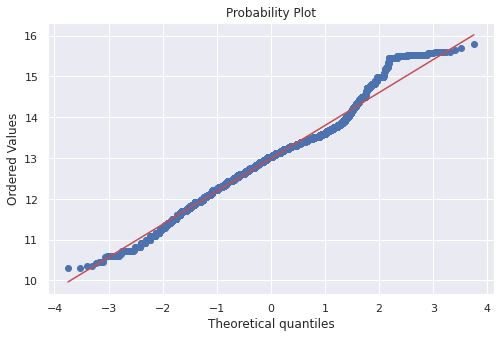

In [165]:
plt.figure(figsize=(8, 5))
stats.probplot(df['selling_price'], plot=plt)
plt.show()

In [166]:
#df['age_bin'] = df['age_bin'].astype(object)

In [167]:
def to_dummies(df):
  obj_cont = []
  obj_disc = []
  cont = []
  for i in df:
    if df[i].dtype == 'object':
      if len(df[i].unique()) <= 5:
        obj_disc.append(i)
      else:
        obj_cont.append(i)
    else:
      cont.append(i)
  
  cont = df[cont]
  to_dummy = df[obj_disc]
  dummied = pd.get_dummies(to_dummy)
  cat_cont = df[obj_cont]
  full_dummy = pd.concat([dummied, cat_cont, cont], axis=1)
  return full_dummy

In [168]:
full_dummy = to_dummies(df)

In [169]:
full_dummy.head()

,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Second Owner,owner_Test Drive Car,owner_Third & Above,selling_price,km_driven,engine,new_mileage,new_rpm,age,power_torque
0,1,0,0,0,1,0,0,1,1,0,0,0,13.017003,11.887931,1248.0,23.40,2000.0,7,5.575949
1,1,0,0,0,1,0,0,1,0,1,0,0,12.821258,11.695247,1498.0,21.14,2000.0,7,5.867940
2,0,0,1,0,1,0,0,1,0,0,0,1,11.970350,11.849398,1497.0,17.70,2700.0,15,4.507557
3,1,0,0,0,1,0,0,1,1,0,0,0,12.323856,11.751942,1396.0,23.00,2250.0,11,4.722064
4,0,0,1,0,1,0,0,1,1,0,0,0,11.775290,11.695247,1298.0,16.10,4500.0,14,4.602166


In [170]:
cont = []
for i in df:
  if df[i].dtype != 'object':
    cont.append(i)

In [171]:
df_cont = df[cont]

In [172]:
def min_max_scaling(df):
    df_norm = df.copy()
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# call the min_max_scaling function
df_cont_scl = min_max_scaling(df_cont)

df_cont_scl.head()

,selling_price,km_driven,engine,new_mileage,new_rpm,age,power_torque
0,0.494115,0.896099,0.209396,0.699761,0.189189,0.230769,0.610010
1,0.458400,0.881575,0.293289,0.632177,0.189189,0.230769,0.704149
2,0.303144,0.893194,0.292953,0.529306,0.378378,0.538462,0.265559
3,0.367644,0.885848,0.259060,0.687799,0.256757,0.384615,0.334716
4,0.267553,0.881575,0.226174,0.481459,0.864865,0.500000,0.296061


In [173]:
full_dummy_new = full_dummy.drop(cont, axis=1)
full_dummy_comp = pd.concat([full_dummy_new, df_cont_scl], axis=1)

In [174]:
full_dummy_comp.shape

(7834, 19)

In [175]:
full_dummy_comp_X = full_dummy_comp.drop('selling_price', axis=1)
full_dummy_comp_y = full_dummy_comp[['selling_price']]

In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    full_dummy_comp_X, full_dummy_comp_y, test_size=0.33, random_state=42)

In [177]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    full_dummy_comp_X, full_dummy_comp_y, test_size=0.4, random_state=42)

In [178]:
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42)

In [179]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(4700, 18)
(4700, 1)
(1567, 18)
(1567, 1)
(1567, 18)
(1567, 1)


In [180]:
from sklearn.tree import DecisionTreeRegressor

In [181]:
dt_reg = DecisionTreeRegressor(random_state=42, max_depth=10)

In [182]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [183]:
fi_col = []
fi_val = []

for i, col in enumerate(full_dummy_comp.drop('selling_price', axis=1)):
  fi_col.append(col)
  fi_val.append(dt_reg.feature_importances_[i])

fi_zip = zip(fi_col, fi_val)

fi_zip_df = pd.DataFrame(fi_zip, columns=['Feature', 'Feature_Importance']).sort_values(by='Feature_Importance', ascending=False).reset_index()
fi_zip_df = fi_zip_df.drop('index', axis=1)

In [184]:
X_train.head(1)

,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Second Owner,owner_Test Drive Car,owner_Third & Above,km_driven,engine,new_mileage,new_rpm,age,power_torque
2942,0,0,1,0,1,0,0,1,1,0,0,0,0.832884,0.125503,0.565191,0.594595,0.538462,0.442663


In [185]:
new_fi = fi_zip_df['Feature_Importance'].apply(lambda x: '%.5f' % x)
fi_zip_df = fi_zip_df.drop('Feature_Importance', axis=1)

fi = pd.concat([fi_zip_df, new_fi], axis=1)

fi

,Feature,Feature_Importance
0,age,0.45303
1,power_torque,0.38339
2,engine,0.04937
3,transmission_Manual,0.04585
4,km_driven,0.02416
5,new_mileage,0.02245
6,new_rpm,0.01604
7,owner_Third & Above,0.00191
8,owner_First Owner,0.00168
9,owner_Second Owner,0.00078


In [186]:
cols_to_keep = fi['Feature'][:7]

In [187]:
cols_to_keep

0                    age
1           power_torque
2                 engine
3    transmission_Manual
4              km_driven
5            new_mileage
6                new_rpm
Name: Feature, dtype: object

In [188]:
X_train = X_train[cols_to_keep]
X_test = X_test[cols_to_keep]

In [189]:
from sklearn.preprocessing import PolynomialFeatures

In [190]:
from sklearn.pipeline import Pipeline

poly_pipeline = Pipeline(steps=[
                               
                               ('poly', PolynomialFeatures(degree=2))        
                               
                               ])

full_dummy_comp_X_poly = poly_pipeline.fit_transform(full_dummy_comp_X)    

In [191]:
full_dummy_comp_X_poly.shape

(7834, 190)

In [192]:
dt_reg.fit(full_dummy_comp_X_poly, full_dummy_comp_y)

fi_col = []
fi_val = []

full_dummy_comp_X_poly_df = pd.DataFrame(full_dummy_comp_X_poly)

for i, col in enumerate(full_dummy_comp_X_poly_df):
  fi_col.append(col)
  fi_val.append(dt_reg.feature_importances_[i])

fi_zip = zip(fi_col, fi_val)

fi_zip_df = pd.DataFrame(fi_zip, columns=['Feature', 'Feature_Importance']).sort_values(by='Feature_Importance', ascending=False).reset_index()
fi_zip_df = fi_zip_df.drop('index', axis=1)

In [193]:
new_fi = fi_zip_df['Feature_Importance'].apply(lambda x: '%.5f' % x)
fi_zip_df = fi_zip_df.drop('Feature_Importance', axis=1)

fi = pd.concat([fi_zip_df, new_fi], axis=1)

fi

,Feature,Feature_Importance
0,182,0.42438
1,123,0.20641
2,189,0.10081
3,179,0.06598
4,68,0.03314
5,173,0.02347
6,144,0.02331
7,176,0.02057
8,133,0.01814
9,183,0.00825


In [194]:
cols_to_keep_poly = fi['Feature'][:21]

In [195]:
full_dummy_comp_X_poly_df = full_dummy_comp_X_poly_df[cols_to_keep_poly]

In [196]:
full_dummy_comp_X_poly_df.shape

(7834, 21)

In [197]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    full_dummy_comp_X_poly_df, full_dummy_comp_y, test_size=0.4, random_state=42)

In [198]:
X_val_poly, X_test_poly, y_val_poly, y_test_poly = train_test_split(
    X_test_poly, y_test_poly, test_size=0.5, random_state=42)

In [199]:
print(X_train_poly.shape)
print(y_train_poly.shape)
print(X_val_poly.shape)
print(y_val_poly.shape)
print(X_test_poly.shape)
print(y_test_poly.shape)

(4700, 21)
(4700, 1)
(1567, 21)
(1567, 1)
(1567, 21)
(1567, 1)


In [200]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR 
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

In [201]:
estimator_dict = {
    
    'SGD': SGDRegressor(n_iter_no_change=3),
    
    'Ada': AdaBoostRegressor(),
    
    'SVR_Linear': LinearSVR(),
    
    'SVR': SVR(kernel='rbf'),
    
    'Random_Forest': RandomForestRegressor(),
    
    'Gradient_Boost': GradientBoostingRegressor(),

    'XGBoost': XGBRegressor(),
}

In [202]:
score_CV_ = []
est_ = []
mse_ = []
r_two_ = []

for i, est in estimator_dict.items():
  print(f"PENDING>>>>>>>")
  est.fit(X_train, y_train)
  score_CV = cross_val_score(est, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
  est_.append(i)
  score_CV_sqrt = np.sqrt(-score_CV)
  score_CV_mean = score_CV_sqrt.mean()
  score_CV_.append(score_CV_mean)
  y_pred = est.predict(X_train)
  m_s_e = mean_squared_error(y_train, y_pred)
  m_s_e_sqrt = np.sqrt(m_s_e)
  mse_.append(round(m_s_e_sqrt, 3))
  r_two = r2_score(y_train, y_pred)
  r_two_.append(round(r_two, 3))
  print(f"{est} COMPLETE\n")


zipped = zip(est_, mse_, score_CV_, r_two_)

zipped_df = pd.DataFrame(zipped, columns = ['Estimator', 'Mse', 'Mse_CV', 'R^2']).sort_values(by='Mse', ascending=True)


PENDING>>>>>>>
SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=3, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False) COMPLETE

PENDING>>>>>>>


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None) COMPLETE

PENDING>>>>>>>


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: Data

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0) COMPLETE

PENDING>>>>>>>


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel()

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) COMPLETE

PENDING>>>>>>>


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) COMPLETE

PENDING>>>>>>>


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) COMPLETE

PENDING>>>>>>>
[00:46:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:46:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:46:22] WARNING: /workspace/src/objective/regression

In [203]:
zipped_df

,Estimator,Mse,Mse_CV,R^2
4,Random_Forest,0.016,0.040801,0.988
5,Gradient_Boost,0.040,0.043478,0.929
6,XGBoost,0.040,0.043719,0.927
3,SVR,0.054,0.055328,0.868
1,Ada,0.059,0.059874,0.844
2,SVR_Linear,0.062,0.062458,0.826
0,SGD,0.076,0.082332,0.738


In [204]:
zipped_df

,Estimator,Mse,Mse_CV,R^2
4,Random_Forest,0.016,0.040801,0.988
5,Gradient_Boost,0.040,0.043478,0.929
6,XGBoost,0.040,0.043719,0.927
3,SVR,0.054,0.055328,0.868
1,Ada,0.059,0.059874,0.844
2,SVR_Linear,0.062,0.062458,0.826
0,SGD,0.076,0.082332,0.738


In [213]:
score_CV_ = []
est_ = []
mse_ = []
r_two_ = []

for i, est in estimator_dict.items():
  print(f"PENDING>>>>>>>")
  est.fit(X_test, y_test)
  score_CV = cross_val_score(est, X_test, y_test, cv=3, scoring='neg_mean_squared_error')
  est_.append(i)
  score_CV_sqrt = np.sqrt(-score_CV)
  score_CV_mean = score_CV_sqrt.mean()
  score_CV_.append(score_CV_mean)
  y_pred = est.predict(X_test)
  m_s_e = mean_squared_error(y_test, y_pred)
  m_s_e_sqrt = np.sqrt(m_s_e)
  mse_.append(round(m_s_e_sqrt, 3))
  r_two = r2_score(y_test, y_pred)
  r_two_.append(round(r_two, 3))
  print(f"{est} COMPLETE\n")


zipped = zip(est_, mse_, score_CV_, r_two_)

zipped_df = pd.DataFrame(zipped, columns = ['Estimator', 'Mse', 'Mse_CV', 'R^2']).sort_values(by='Mse', ascending=True)


PENDING>>>>>>>
SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=3, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False) COMPLETE

PENDING>>>>>>>


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None) COMPLETE

PENDING>>>>>>>
LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0) COMPLETE

PENDING>>>>>>>


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/p

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) COMPLETE

PENDING>>>>>>>


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) COMPLETE

PENDING>>>>>>>


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) COMPLETE

PENDING>>>>>>>
[00:58:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:58:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:58:42] WARNING: /workspace/src/objective/regression

In [214]:
zipped_df

,Estimator,Mse,Mse_CV,R^2
4,Random_Forest,0.017,0.046696,0.987
5,Gradient_Boost,0.038,0.048747,0.936
6,XGBoost,0.039,0.048584,0.932
1,Ada,0.057,0.060282,0.861
3,SVR,0.057,0.058733,0.860
2,SVR_Linear,0.063,0.063646,0.826
0,SGD,0.096,0.102219,0.601


In [206]:
pipe = Pipeline([
                 ('class', RandomForestRegressor())
])

In [207]:
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [208]:
search_space = [
                {'class': [RandomForestRegressor()],
                 'class__max_features': list(range(1, 10)),
                 'class__min_samples_leaf': list(range(1,5)),
                 'class__min_samples_split': list(range(1,5)),
                 'class__n_estimators': [100,200],
                 'class__max_depth': list(range(10, 60, 10)),
                }
]

In [209]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipe, param_grid=search_space, cv=3, scoring='neg_mean_squared_error',  verbose=True, n_jobs=-1)
clf = clf.fit(X_train, y_train)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.1s


KeyboardInterrupt: ignored

In [210]:
def find_score(est, X, y):
  score_CV_ = []
  est_ = []
  mse_ = []
  r_two_ = []
  
  score_CV = cross_val_score(est, X, y, cv=3, scoring='neg_mean_squared_error')
  est_.append(est)
  score_CV_sqrt = np.sqrt(-score_CV)
  score_CV_mean = score_CV_sqrt.mean()
  score_CV_.append(score_CV_mean)
  y_pred = est.predict(X)
  m_s_e = mean_squared_error(y, y_pred)
  m_s_e_sqrt = np.sqrt(m_s_e)
  mse_.append(round(m_s_e_sqrt, 3))
  r_two = r2_score(y, y_pred)
  r_two_.append(round(r_two, 3))


  zipped = zip(est_, mse_, score_CV_, r_two_)

  zipped_df = pd.DataFrame(zipped, columns = ['Estimator', 'Mse', 'Mse_CV', 'R^2'])
  return zipped_df

In [212]:
find_score(RandomForestRegressor(), X_val, y_val)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


NotFittedError: ignored